# Preprocessing

# 1.0 Importing packages and data

In [1]:
import pandas as pd
import numpy as np
from pycaret import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from collections import defaultdict

from PIL import Image
from PIL import ImageShow

import skimage.io as io
from skimage.feature import hog
from skimage import data, exposure

In [3]:
df = pd.read_csv('/Users/chinmayasukumar/Documents/Capstone Projects/Capstone-3_Classifying_steel_defects/data/interim/data.csv')

In [4]:
df.columns

Index(['Filename', 'Type', 'Number'], dtype='object')

In [5]:
df.head()

,Filename,Type,Number
0,Cr_1.bmp,Crazing,1
1,Cr_10.bmp,Crazing,10
2,Cr_100.bmp,Crazing,100
3,Cr_101.bmp,Crazing,101
4,Cr_102.bmp,Crazing,102


In [6]:
df.drop(columns=['Number'], inplace=True)

In [7]:
df.head()

,Filename,Type
0,Cr_1.bmp,Crazing
1,Cr_10.bmp,Crazing
2,Cr_100.bmp,Crazing
3,Cr_101.bmp,Crazing
4,Cr_102.bmp,Crazing


In [10]:
# Checking size

counter = list()
gen_path = '/Users/chinmayasukumar/Documents/Capstone Projects/Capstone-3_Classifying_steel_defects/data/raw/'

# Iterating over 300 images in all 6 defect types
for i in range(0, 300):
    
    #Collecting image paths into one list
    image_paths = [gen_path + (n+'/') + df[df['Type'] == n].iloc[i,0] for n in ['Crazing', 'Inclusions', 'Pitted',\
                                                                                'Scratches', 'Rolled', 'Patches']]
    
    # Iterating and opening individual files to check for size
    for path in image_paths:
        img = Image.open(path)
        counter.append(img.size)

In [11]:
# Creating Series of image sizes to check for sizes othwer than (200, 200) using .unique()
series = pd.Series(counter)

print(series.shape, series.unique())

(1800,) [(200, 200)]


In [12]:
# Empty list to be filled with image arrays
img_list = list()

In [13]:
# Creating array of images
def img_grabber(defect):
    
    # Opening individual image based on defect
    img = Image.open(gen_path + defect + path)
    arr = np.array(img)
    img_list.append(arr)

In [14]:
# Converting all images to arrays and storing them in img_list using img_grabber()

for path in df['Filename']:
    if path[:2] == 'Cr':
        img_grabber('Crazing/')
    elif path[:2] == 'In':
        img_grabber('Inclusions/')
    elif path[:2] == 'Pa':
        img_grabber('Patches/')
    elif path[:2] == 'PS':
        img_grabber('Pitted/')
    elif path[:2] == 'RS':
        img_grabber('Rolled/')
    else:
        img_grabber('Scratches/')

In [15]:
# Making img_list into an array

img_arr = np.array(img_list)
img_arr.shape

(1800, 200, 200)

In [ ]:
# Checking order of defect types

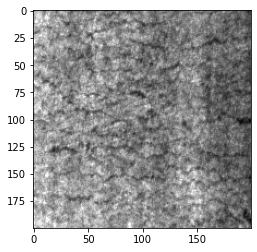

In [16]:
plt.imshow(img_arr[0], cmap='gray')

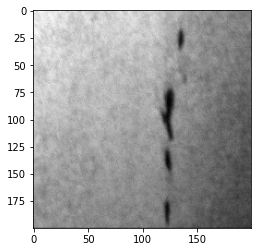

In [32]:
plt.imshow(img_arr[350], cmap='gray')

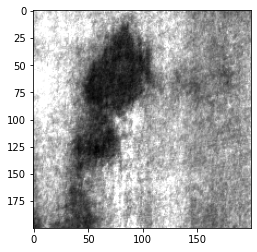

In [46]:
plt.imshow(img_arr[600], cmap='gray')

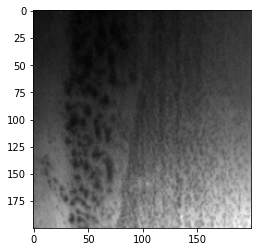

In [43]:
plt.imshow(img_arr[900], cmap='gray')

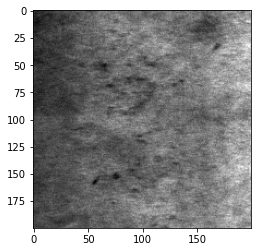

In [47]:
plt.imshow(img_arr[1200], cmap='gray')

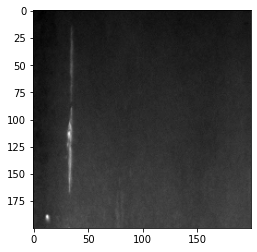

In [21]:
plt.imshow(img_arr[1500], cmap='gray')

In [60]:
# Standardizing
img_arr = img_arr/255.0

In [61]:
# Saving images array
np.save('/Users/chinmayasukumar/Documents/Springboard/Capstone 3 - Metal defect detection/data/interim/images.npy',\
       img_arr)